# NLP - Encoding, Embedding, Recurrent Neural Networks 


In [4]:
from tensorflow.keras.datasets import imdb
import warnings
import numpy as np

warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data); y_train = np.array(train_labels).astype(np.float32)

x_test = vectorize_sequences(test_data); y_test = np.array(test_labels).astype(np.float32)

### SimpleRNN ma dwa tryby pracy. Może zwracać pełne sekwencje w postaci w postaci 3d tesnorow [batch_size, timesteps, output_features] lub też uproszczona wersje w postaci ostaniej warstwy [batch_size, output_features]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
 
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(SimpleRNN(32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense
 
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Trening modelu z warstwami embednig i simpleRNN

In [ ]:
from tensorflow.keras.preprocessing import sequence

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

input_train = sequence.pad_sequences(train_data, maxlen=500)
input_test = sequence.pad_sequences(test_data, maxlen=500)

input_train.shape, input_test.shape

((25000, 500), (25000, 500))

In [ ]:
from keras import activations
from keras import optimizers, losses

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation=activations.sigmoid))

model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    input_train, train_labels,    
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.5471 - loss: 0.6760 - val_accuracy: 0.8030 - val_loss: 0.4353
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.8145 - loss: 0.4244 - val_accuracy: 0.8258 - val_loss: 0.4064
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.8746 - loss: 0.3114 - val_accuracy: 0.8392 - val_loss: 0.4129
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - accuracy: 0.9245 - loss: 0.1984 - val_accuracy: 0.7544 - val_loss: 0.7030
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.9596 - loss: 0.1159 - val_accuracy: 0.7970 - val_loss: 0.5857
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accuracy: 0.9788 - loss: 0.0615 - val_accuracy: 0.7624 - val_loss: 0.8027
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.6888 - val_loss: 1.0355
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.9930 - loss: 0

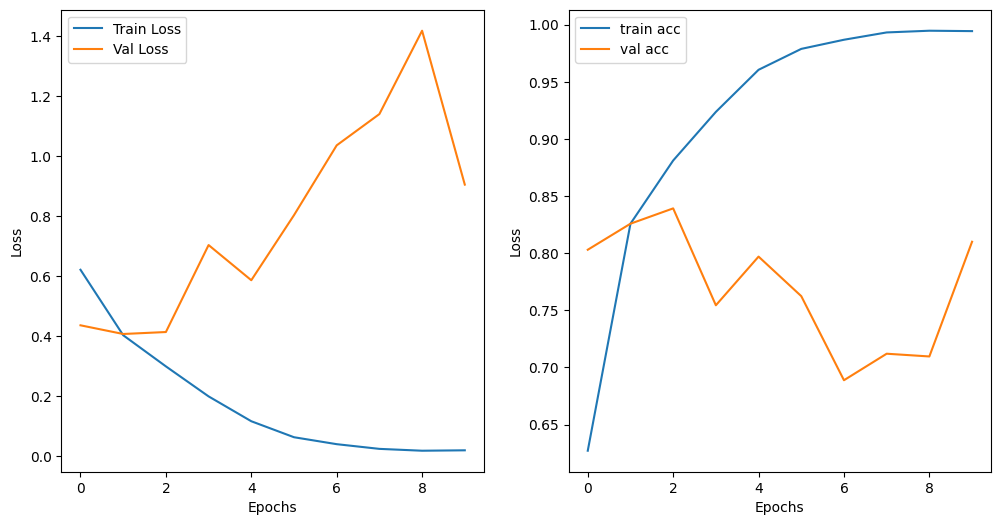

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history_dict['loss'], label='Train Loss')
axs[0].plot(history_dict['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_dict['accuracy'], label='train acc')
axs[1].plot(history_dict['val_accuracy'], label='val acc')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

In [31]:
from keras import layers

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(layers.LSTM(units=32, return_sequences=True))
model.add(layers.LSTM(units=32))
model.add(Dense(1, activation=activations.sigmoid))

model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    input_train, train_labels,    
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 304ms/step - accuracy: 0.5545 - loss: 0.6694 - val_accuracy: 0.7878 - val_loss: 0.4565
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.8016 - loss: 0.4388 - val_accuracy: 0.8284 - val_loss: 0.3904
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.8567 - loss: 0.3438 - val_accuracy: 0.8706 - val_loss: 0.3193
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - accuracy: 0.8864 - loss: 0.2836 - val_accuracy: 0.8526 - val_loss: 0.3573
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 323ms/step - accuracy: 0.8869 - loss: 0.2759 - val_accuracy: 0.8826 - val_loss: 0.3039
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - accuracy: 0.9041 - loss: 0.2481 - val_accuracy: 0.8590 - val_loss: 0.3204
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 305ms/step - accuracy: 0.9156 - loss: 0.2235 - val_accuracy: 0.8574 - val_loss: 0.3293
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.9273 - loss: 0

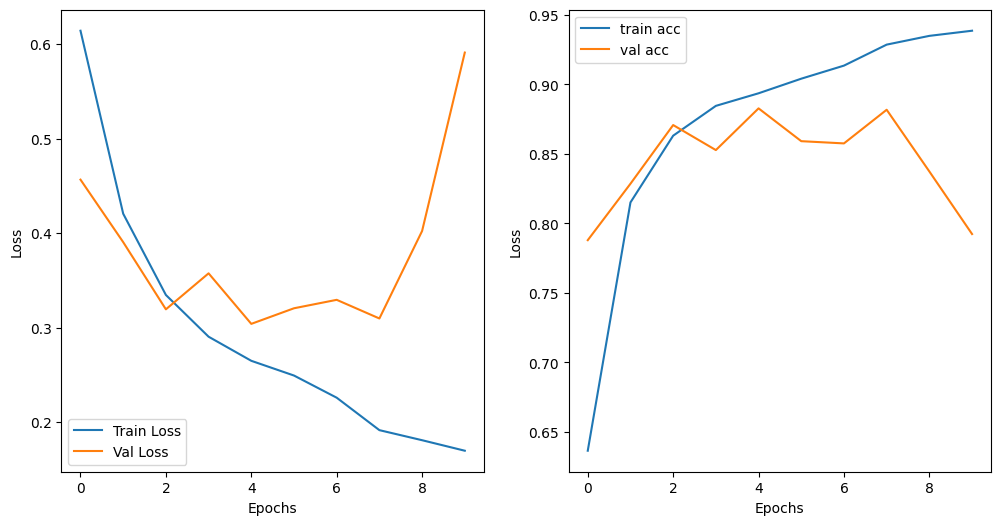

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history_dict['loss'], label='Train Loss')
axs[0].plot(history_dict['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_dict['accuracy'], label='train acc')
axs[1].plot(history_dict['val_accuracy'], label='val acc')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

|